# Final Project (Breast Cancer Wisconsin Dataset)

### Kunal Singh, Santhosh Subramanian

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import keras

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
data = pd.read_csv("wdbc.data.csv",header=0)

In [3]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_SE                  569 non-null float64
texture_SE                 569 non-null float64
perimeter_SE               569 non-null float64
area_SE                    569 non-null float64
smoothness_SE              569 non-null float64
compactness_SE             569 non-null float64
concavity_SE               569 non

In [5]:
data.drop("id",axis=1,inplace=True)

In [6]:
print(data.head(5))

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...                  

In [7]:
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']


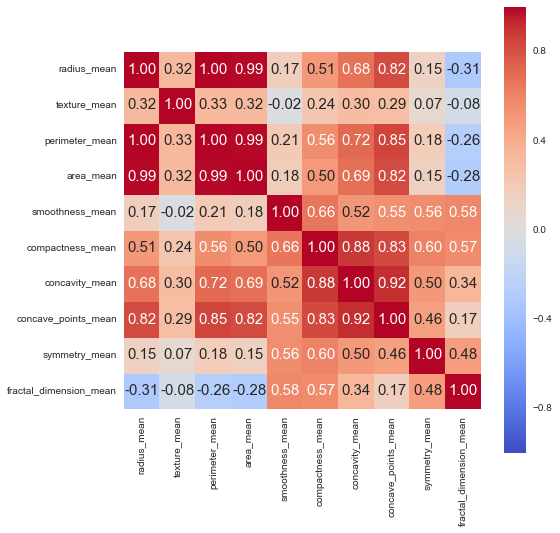

In [8]:
corr = data[features_mean].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, 
            xticklabels= features_mean, yticklabels= features_mean,
            cmap= 'coolwarm')

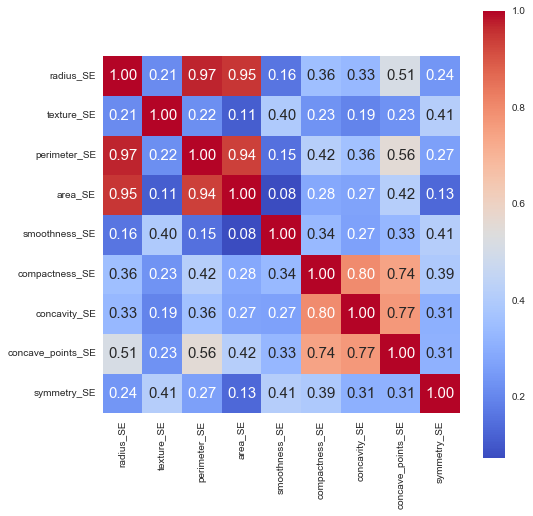

In [9]:
corr = data[features_se].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            xticklabels= features_se, yticklabels= features_se,
            cmap= 'coolwarm')

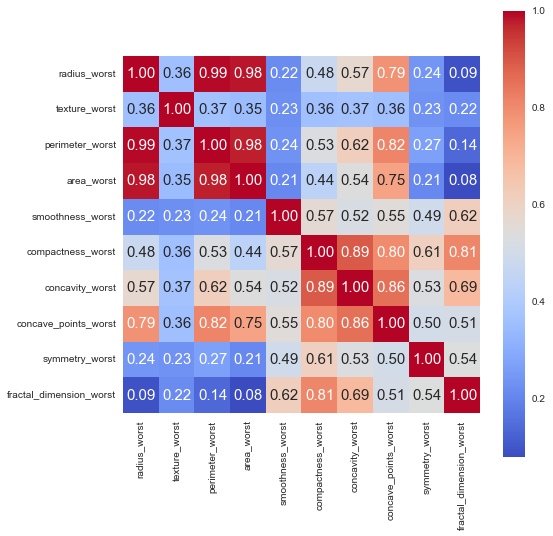

In [10]:
corr = data[features_worst].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, 
            xticklabels= features_worst, yticklabels= features_worst, 
            cmap= 'coolwarm')

In [11]:
#Radius, perimeter and area are highly correlated
#Compactness, concavity and concave points are also highly correlated

In [12]:
train, test = train_test_split(data, test_size = 0.2)
print(train.shape)
print(test.shape)

(455, 31)
(114, 31)


In [13]:
#Diagnosis column is mapped to integer value
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [14]:
#Labels for training and test data
train_labels = train.diagnosis
test_labels = test.diagnosis

In [15]:
#See which features to pick

from sklearn.ensemble import RandomForestClassifier

train_X= train[data.columns[1:31]]
test_X = test[data.columns[1:31]]

rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(train_X,train_labels)
prediction = rand_forest.predict(test_X)
print(metrics.accuracy_score(prediction,test_labels))

featimp = pd.Series(rand_forest.feature_importances_, index=data.columns[1:31]).sort_values(ascending=False)
print(featimp)

0.956140350877
area_worst                 0.139287
concave_points_worst       0.125739
perimeter_worst            0.124496
radius_worst               0.102026
concave_points_mean        0.100737
perimeter_mean             0.056528
radius_mean                0.043335
area_mean                  0.040000
concavity_worst            0.036006
concavity_mean             0.029812
area_SE                    0.028656
compactness_worst          0.025427
texture_worst              0.016163
compactness_mean           0.014897
texture_mean               0.014013
perimeter_SE               0.013305
symmetry_worst             0.011984
radius_SE                  0.011065
smoothness_worst           0.010863
concave_points_SE          0.009142
fractal_dimension_worst    0.006975
smoothness_mean            0.005794
symmetry_mean              0.005343
concavity_SE               0.004977
texture_SE                 0.004361
symmetry_SE                0.004220
fractal_dimension_SE       0.004080
fractal_dimen

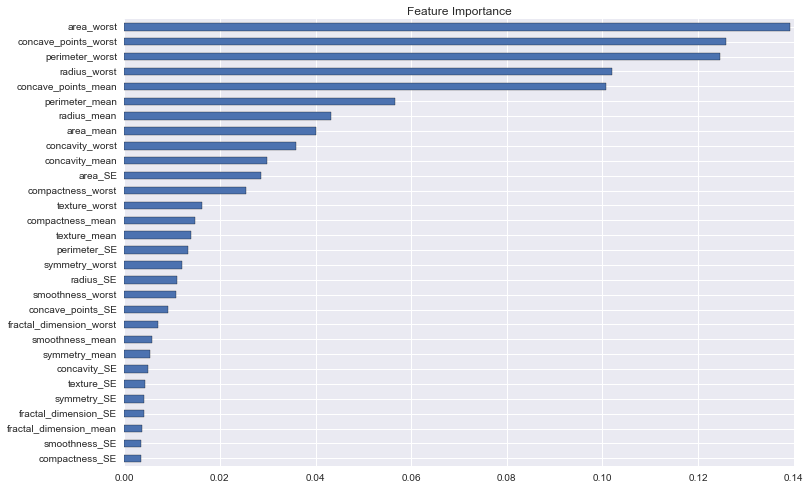

In [16]:
plt.figure(figsize=(12,8))
plt.title('Feature Importance')
_ = featimp.sort_values(ascending=True).plot(kind='barh')

In [20]:
#In general, standard error features are of least important

#concave_points_worst       0.139911
#perimeter_worst            0.121034
#concave_points_mean        0.120095
#area_worst                 0.091847
#radius_worst               0.088480
#concavity_mean             0.065043
#perimeter_mean             0.059991
#area_mean                  0.053795
#radius_mean                0.048585
#concavity_worst            0.024480
#texture_worst              0.016268
#texture_mean               0.015812
#compactness_worst          0.015311
#smoothness_worst           0.013983
#symmetry_worst             0.008310

#perimeter_SE, radius_SE, area SE taken out

#Radius, perimeter and area are highly correlated
#Compactness, concavity and concave points are also highly correlated

#concave_points_worst       0.139911
#perimeter_worst            0.121034
#concave_points_mean        0.120095
#area_worst                 0.091847
#radius_worst               0.088480
#concavity_mean             0.065043
#perimeter_mean             0.059991
#area_mean                  0.053795
#radius_mean                0.048585
#concavity_worst            0.024480
#texture_worst              0.016268
#texture_mean               0.015812
#smoothness_worst           0.013983
#symmetry_worst             0.008310

#compactness_worst taken out b/c correlated with concave_points, concavity
#concavity_mean and concavity_worst included b/c they still have high importance
#area and radius both included because both of high importance

#included symmetry for variety in features

In [21]:
#Final list of features

columns_total = ['concave_points_worst', 'perimeter_worst', 'concave_points_mean', 'area_worst', 'radius_worst', 
                 'concavity_mean', 'perimeter_mean', 'area_mean', 'radius_mean', 'concavity_worst', 'texture_worst',
                 'texture_mean', 'smoothness_worst', 'symmetry_worst']

In [37]:
#Cross Validation to prevent overfitting

def classification_model(model,data,prediction_input,output):
    
    kf = KFold(data.shape[0], n_folds=5)
    scores = []
    for train, test in kf: 
        train_X = (data[prediction_input].iloc[train,:])
        train_y = output.iloc[train]
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=output.iloc[test]
        scores.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(scores)))

In [23]:
#Parameter search

def gridsearch(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    
    clf.fit(data_X,data_y)
    print("The best parameter found on development set is: ")
    print(clf.best_params_)
    print("the best estimator is: ")
    print(clf.best_estimator_)
    print("The best score is: ")
    print(clf.best_score_)

In [96]:
#SVM (Parameter Tuning)

svm_model = svm.SVC()
param_grid = [
              {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
               'gamma': [0.1, 0.01, 0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]

gridsearch(svm_model,param_grid,x_train,train_labels)

The best parameter found on development set is: 
{'kernel': 'linear', 'C': 100}
the best estimator is: 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The best score is: 
0.962637362637


In [48]:
#SVM Training

svm_model = svm.SVC(C=100, kernel= 'linear')
svm_model.fit(train[columns_total], train_labels)
prediction=svm_model.predict(test[columns_total])
metrics.accuracy_score(prediction,test_labels)

0.97368421052631582

In [38]:
#SVM CV

svm_model = svm.SVC(C=100, kernel= 'linear')
classification_model(svm_model,data,columns_total,data['diagnosis'])

Cross-Validation Score : 91.228%
Cross-Validation Score : 94.298%
Cross-Validation Score : 95.029%
Cross-Validation Score : 95.175%
Cross-Validation Score : 95.255%


In [101]:
#Decision Tree (Parameter Tuning)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

dec_tree= DecisionTreeClassifier()
gridsearch(dec_tree,param_grid,train[columns_total],train_labels)

The best parameter found on development set is: 
{'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_split': 2, 'max_depth': None, 'min_samples_leaf': 1}
the best estimator is: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
The best score is: 
0.958241758242


In [26]:
#Decision Tree Training

dec_tree= DecisionTreeClassifier(max_features='auto', max_leaf_nodes= None, 
                                 min_samples_split= 2, max_depth= None, min_samples_leaf= 1)
dec_tree.fit(train[columns_total], train_labels)
prediction=dec_tree.predict(test[columns_total])
metrics.accuracy_score(prediction,test_labels)

0.95614035087719296

In [45]:
#Decision Tree CV

dec_tree = DecisionTreeClassifier(max_features='auto', max_leaf_nodes= None, 
                                 min_samples_split= 2, max_depth= None, min_samples_leaf= 1)
classification_model(dec_tree,data,columns_total,data['diagnosis'])

Cross-Validation Score : 92.982%
Cross-Validation Score : 93.421%
Cross-Validation Score : 94.152%
Cross-Validation Score : 94.079%
Cross-Validation Score : 93.316%


In [29]:
#Logistic Regression (Parameter Tuning)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

print('l1')
log_reg = LogisticRegression(penalty = 'l1')
gridsearch(log_reg,param_grid,train[columns_total],train_labels)

print('l2')
log_reg = LogisticRegression(penalty = 'l2')
gridsearch(log_reg,param_grid,train[columns_total],train_labels)

l1
The best parameter found on development set is: 
{'C': 100}
the best estimator is: 
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
The best score is: 
0.969230769231
l2
The best parameter found on development set is: 
{'C': 1000}
the best estimator is: 
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
The best score is: 
0.962637362637


In [30]:
#Logistic Regression (L1)

log_reg = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
log_reg.fit(train[columns_total], train_labels)
prediction=log_reg.predict(test[columns_total])
metrics.accuracy_score(prediction,test_labels)

0.98245614035087714

In [31]:
#Logistic Regression (L2) Training

log_reg = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
log_reg.fit(train[columns_total], train_labels)
prediction=log_reg.predict(test[columns_total])
metrics.accuracy_score(prediction,test_labels)

0.99122807017543857

In [46]:
#Logistic Regression CV (L1)

log_reg = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
classification_model(log_reg,data,columns_total,data['diagnosis'])

Cross-Validation Score : 94.737%
Cross-Validation Score : 96.053%
Cross-Validation Score : 96.784%
Cross-Validation Score : 96.930%
Cross-Validation Score : 97.013%


In [47]:
#Logistic Regression CV (L2)

log_reg = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
classification_model(log_reg,data,columns_total,data['diagnosis'])

Cross-Validation Score : 93.860%
Cross-Validation Score : 96.053%
Cross-Validation Score : 96.491%
Cross-Validation Score : 96.272%
Cross-Validation Score : 95.956%


In [39]:
#Random Forest Parameter Tuning

param_grid = {"max_depth": [None, 2, 5, 10],
              'max_features': ['auto', 'sqrt', 'log2'],
              "min_samples_split": [2, 10, 20],
              "min_samples_leaf": [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

rand_forest = RandomForestClassifier(n_estimators=100)
gridsearch(rand_forest,param_grid,train[columns_total],train_labels)

The best parameter found on development set is: 
{'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 10, 'criterion': 'entropy', 'max_features': 'log2', 'max_depth': None}
the best estimator is: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
The best score is: 
0.96043956044


In [40]:
#Random Forest Training 

rand_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
rand_forest.fit(train[columns_total], train_labels)
prediction=rand_forest.predict(test[columns_total])
metrics.accuracy_score(prediction,test_labels)

0.98245614035087714

In [48]:
#Random Forest CV

rand_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
classification_model(rand_forest,data,columns_total,data['diagnosis'])

Cross-Validation Score : 92.982%
Cross-Validation Score : 94.298%
Cross-Validation Score : 95.906%
Cross-Validation Score : 96.272%
Cross-Validation Score : 96.487%


In [78]:
#Onto Neural Network

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Flatten

#redoing train/test split b/c previous split is not in right format
X_train, X_test, y_train, y_test = train_test_split(data[features], 
                                                    data['diagnosis'].values, test_size=0.2)

In [106]:
model = Sequential()
model.add(Dense(input_dim=30, output_dim=30))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=30, input_dim=30)`
  from ipykernel import kernelapp as app


In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 30)                930       
_________________________________________________________________
activation_21 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_22 (Activation)   (None, 10)                0         
Total params: 6,188
Trainable params: 6,188
Non-trainable params: 0
_________________________________________________________________


In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model.fit(scaler.fit_transform(X_train), y_train)

Epoch 1/10
455/455 [==============================] - 0s - loss: 0.1621 - acc: 0.9604     
Epoch 2/10
455/455 [==============================] - 0s - loss: 0.1523 - acc: 0.9626     
Epoch 3/10
455/455 [==============================] - 0s - loss: 0.1440 - acc: 0.9670     
Epoch 4/10
455/455 [==============================] - 0s - loss: 0.1370 - acc: 0.9626     
Epoch 5/10
455/455 [==============================] - 0s - loss: 0.1312 - acc: 0.9692     
Epoch 6/10
455/455 [==============================] - 0s - loss: 0.1265 - acc: 0.9714     
Epoch 7/10
455/455 [==============================] - 0s - loss: 0.1221 - acc: 0.9736     
Epoch 8/10
455/455 [==============================] - 0s - loss: 0.1182 - acc: 0.9714     
Epoch 9/10
455/455 [==============================] - 0s - loss: 0.1143 - acc: 0.9736     
Epoch 10/10
455/455 [==============================] - 0s - loss: 0.1114 - acc: 0.9736     


In [112]:
y_prediction = model.predict_classes(scaler.transform(X_test.values))
print ("\n\naccuracy" , np.sum(y_prediction == y_test) / float(len(y_test)))

 32/114 [=======>......................] - ETA: 0s('\n\naccuracy', 0.98245614035087714)
